# Atividade 01 - Parte 01 - Inventário de emissões utilizando Python

Aluna: Bruna Boscato Toscani

# Planilha de fatores de emissões compiladas:
Utilizei o capítulo 1.1 da AP-42, pois meu empreendimento é uma termoelétrica.
https://www.epa.gov/sites/default/files/2020-09/documents/1.1_bituminous_and_subbituminous_coal_combustion.pdf

In [11]:
# Utilizando Pandas para abrir a planilha
import pandas as pd
import os

# Coletando o caminho da pasta que estou
cwd = os.getcwd()

# Pasta dos fatores de emissão
path = cwd+'\\tabelas\\FE'
print(path)

# Indicando nome do arquivo
chapterNumer = 1
subChapter = 1
file = 'chpt_'+str(chapterNumer)+'_'+str(subChapter)+'.csv'
print(file)

# Abrindo arquivo utilizando o Pandas
fe = pd.read_csv(path +'\\'+file)
print(fe)

C:\Users\bruna\OneDrive\Documentos\UFSC\Controle de Poluicao Atmosferica\ENS5173_20241\tabelas\FE
chpt_1_1.csv
  Firing Configuration    PM  PM-10   SOx    NOx      CO  CPM - TOT
0       PC/DB/CB fired   5.0   1.15  17.5   7.00    0.25        4.0
1        PC/WB/W fired   3.5   1.30  17.5  12.00    0.25        4.0
2     Cyclone Furnance   1.0   0.13  17.5   8.50    0.25        NaN
3      Spreader Stoker  33.0   6.60  17.5   4.40    2.50        2.0
4     Overfeed stokeri   8.0   3.00  19.0   3.75    3.00        2.0
5     Underfeed stoker   7.5   3.10  15.5   4.75    5.50        2.0
6       Hand-fed units   7.5   3.10  15.5   4.55  137.50        NaN


Conforme o site da empresa Diamante de Capivari de baixo, a termoelétrica tem capacidade de até 740MW. https://diamanteenergia.com/institucional-diamante/historia-ctjl/

No relatório resumo de monitoramento ambiental das emissões atmosféricas, mostra que em 2023 a produção da termoelétrica, com todas as usinas juntas, foi de 4015298 MWh. https://diamanteenergia.com/sustentabilidade/gestao-ambiental/

263002019.0
1
2
3
4
5
6


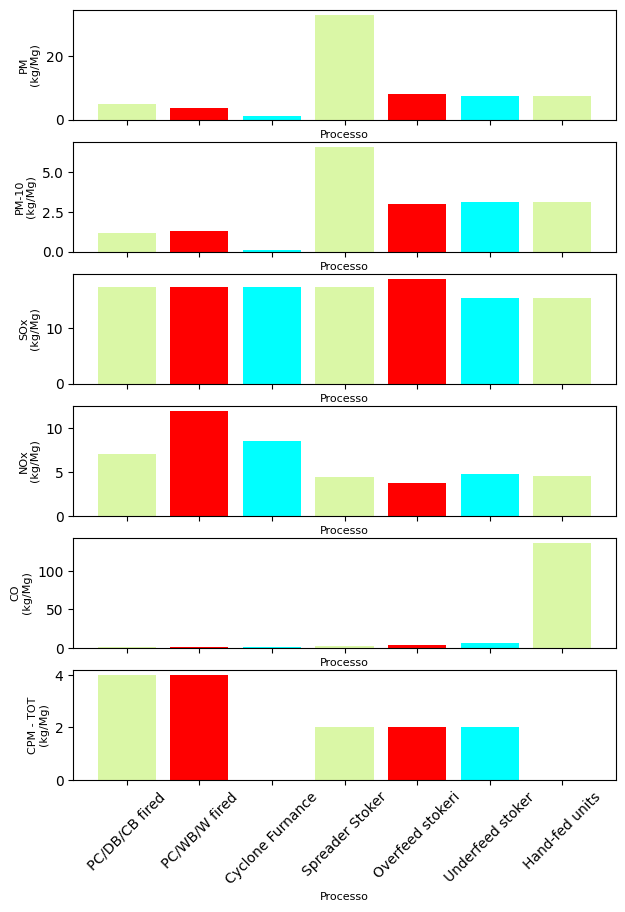

In [12]:
# Plotando os fatores de emissão
import matplotlib.pyplot as plt

atv = 4015298 # Taxa de atividade em MWh da empresa em 2023
emis = fe['PM']*atv

#Somando dataframe
print(emis.sum())

# Criando a figura com Matplotlib
fig, ax = plt.subplots(len(fe.columns)-1, 1, sharex=True, figsize=(7, 10))

# Loop para preencher o subplot com os gráficos de barra
for ii in range(1, len(fe.columns)):
    print(ii)
    ax[ii-1].bar(fe['Firing Configuration'], fe.iloc[:,ii], color=['#DAF7A6','red','cyan'])
    ax[ii-1].set_xlabel('Processo', fontsize=8)
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n(kg/Mg)', fontsize=8) 
    ax[ii-1].tick_params(axis='x', labelrotation=45)  # Define a rotação do rótulo do eixo x

# Salvando a figura na pasta figures
fig.savefig(cwd+'\\figures\\barplot_fatorEmiss.png')

Analisando o gráfico, as emissões de óxidos de enxofre (SOx) se destacam como o principal contribuinte para a poluição.

Os resultados obtidos da empresa Diamante - Capivari de Baixo revelam uma taxa de 1,92g/s de material particulado, 25,65g/s de NO2, 177,713g/s de SO2 e 2977g/s de O2. Ao confrontarmos esses dados com as informações do gráfico, torna-se evidente que o SO2 é o principal poluente, dado seu alto valor em comparação com os outros poluentes medidos. https://diamanteenergia.com/sustentabilidade/gestao-ambiental/

Realizando o somatório das taxas de emissões da empresa Diamante - Capivari de Baixo, da um total de 3182,28g/s.

## Taxa de atividade aleatória com sazonalidade

Taxa de atividade da empresa Diamante - Capivari de Baixo que contenha sazonalidade ao longo dos meses do ano.

Seguindo o mesmo relatório de emissões atmosféricas de 2023 da empresa, mostrou que o máximo gerado em um mês foi 399510,53MWh e o mínimo foi de 255299,16MWh. 

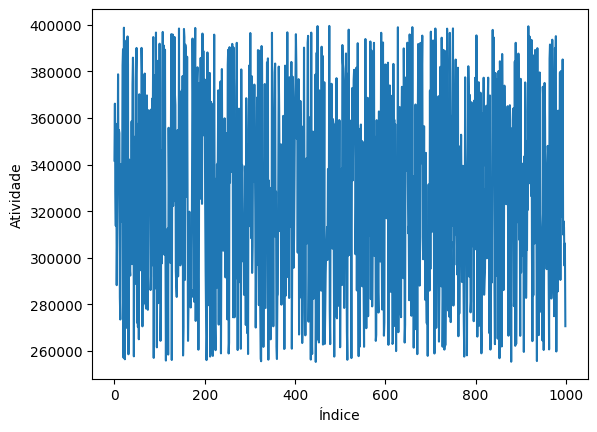

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo os valores máximo e mínimo da atividade da empresa em 2023
atvMax = 399510.53 
atvMin = 255299.16

# Definindo o número de valores aleatórios a serem gerados
n = 1000

# Gerando os valores de atividade
atv = (atvMax - atvMin) * np.random.rand(n) + atvMin

# Criando uma figura e um eixo para o gráfico
fig, ax = plt.subplots()

# Plotando os valores de atividade
ax.plot(atv)

# Adicionando rótulos aos eixos
ax.set_xlabel('Índice')
ax.set_ylabel('Atividade')

# Exibindo o gráfico
plt.show()

In [14]:
# Criar um vetor com as datas
from datetime import datetime, timedelta

# Definindo a data inicial e final
data_inicial = datetime(2023, 1, 1)
data_final = datetime(2023, 12, 31)

# Definindo o passo (intervalo entre as datas)
passo = timedelta(days=1)

# Criando o vetor de datas
vetor_datas = []
data_atual = data_inicial
while data_atual <= data_final:
    vetor_datas.append(data_atual)
    data_atual += passo

# Exibindo o vetor de datas
for data in vetor_datas:
    print(data)

2023-01-01 00:00:00
2023-01-02 00:00:00
2023-01-03 00:00:00
2023-01-04 00:00:00
2023-01-05 00:00:00
2023-01-06 00:00:00
2023-01-07 00:00:00
2023-01-08 00:00:00
2023-01-09 00:00:00
2023-01-10 00:00:00
2023-01-11 00:00:00
2023-01-12 00:00:00
2023-01-13 00:00:00
2023-01-14 00:00:00
2023-01-15 00:00:00
2023-01-16 00:00:00
2023-01-17 00:00:00
2023-01-18 00:00:00
2023-01-19 00:00:00
2023-01-20 00:00:00
2023-01-21 00:00:00
2023-01-22 00:00:00
2023-01-23 00:00:00
2023-01-24 00:00:00
2023-01-25 00:00:00
2023-01-26 00:00:00
2023-01-27 00:00:00
2023-01-28 00:00:00
2023-01-29 00:00:00
2023-01-30 00:00:00
2023-01-31 00:00:00
2023-02-01 00:00:00
2023-02-02 00:00:00
2023-02-03 00:00:00
2023-02-04 00:00:00
2023-02-05 00:00:00
2023-02-06 00:00:00
2023-02-07 00:00:00
2023-02-08 00:00:00
2023-02-09 00:00:00
2023-02-10 00:00:00
2023-02-11 00:00:00
2023-02-12 00:00:00
2023-02-13 00:00:00
2023-02-14 00:00:00
2023-02-15 00:00:00
2023-02-16 00:00:00
2023-02-17 00:00:00
2023-02-18 00:00:00
2023-02-19 00:00:00


In [15]:
# Criando vetor de datas
import pandas as pd

# Criar um intervalo de datas
datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

# Criar um DataFrame com as datas
df = pd.DataFrame({'Data': datas})

# Extrair os meses das datas e adicioná-los como uma nova coluna no DataFrame
df['Mes'] = df['Data'].dt.month

# Mostrar o DataFrame resultante
print(df)

          Data  Mes
0   2023-01-01    1
1   2023-01-02    1
2   2023-01-03    1
3   2023-01-04    1
4   2023-01-05    1
..         ...  ...
360 2023-12-27   12
361 2023-12-28   12
362 2023-12-29   12
363 2023-12-30   12
364 2023-12-31   12

[365 rows x 2 columns]


Ajustando meus números aleatórios com base no comprimento do vetor de datas

          Data  Mes      atividade  sazonalidade  aleatorioSazonal
0   2023-01-01    1  399194.245015      1.866025     690346.415918
1   2023-01-02    1  379937.696917      1.866025     733535.782573
2   2023-01-03    1  339360.425509      1.866025     513144.601715
3   2023-01-04    1  326092.151994      1.866025     591428.894854
4   2023-01-05    1  342061.868339      1.866025     540198.034261
..         ...  ...            ...           ...               ...
360 2023-12-27   12  278350.138317      2.000000     760002.666871
361 2023-12-28   12  385788.468817      2.000000     580622.157351
362 2023-12-29   12  303296.861004      2.000000     723653.926441
363 2023-12-30   12  354146.805914      2.000000     620093.781112
364 2023-12-31   12  339798.008465      2.000000     622578.144731

[365 rows x 5 columns]


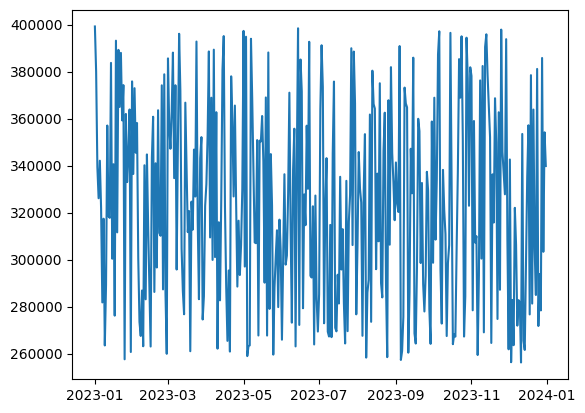

In [19]:
# Criando dataframe com datas e valores de atividade aleatória
import pandas as pd

# Extraindo o número de linhas/número de datas
n = df.shape[0]

# Criando atividade aleatória
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin
df['atividade'] = atv
#print(atv)
print(df)
df.to_csv(r"C:\Users\bruna\OneDrive\Documentos\UFSC\Controle de Poluicao Atmosferica\ENS5173_20241\tabelas\ativ.csv")


# Criando uma figura com os valores aleatórios
fig, ax= plt.subplots()
ax.plot(datas, atv)

Esse resultado demonstra como a atividade varia ao longo do tempo, influenciada pela sazonalidade e pelos valores aleatórios gerados, fornecendo uma visão detalhada da variabilidade temporal da taxa de atividade.

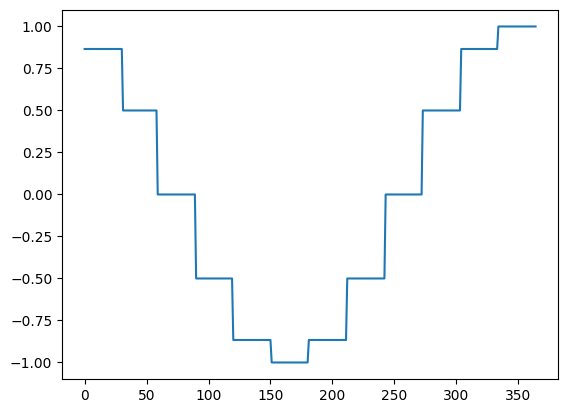

In [17]:
# Criando componente sazonal
sazonalidade = np.cos((2*np.pi)*df['Mes']/12)
plt.plot(sazonalidade)
df['sazonalidade'] = sazonalidade + 1
df.to_csv(r"C:\Users\bruna\OneDrive\Documentos\UFSC\Controle de Poluicao Atmosferica\ENS5173_20241\tabelas\ativ.csv")

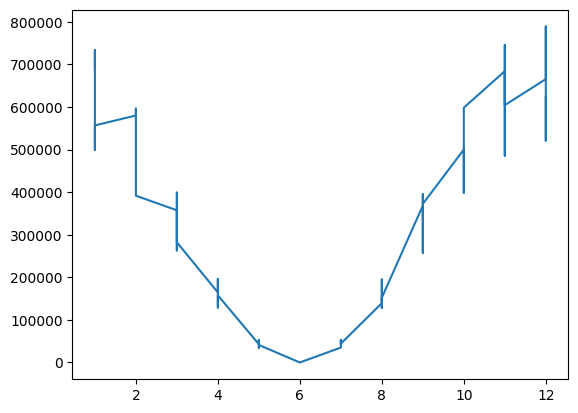

In [18]:
# Valores aleatórios com sazonalidade
df['aleatorioSazonal'] = df['atividade'] * df['sazonalidade'] 
plt.plot(df['Mes'], df['aleatorioSazonal'])